In [123]:
import numpy as np
import matplotlib.pyplot as plt

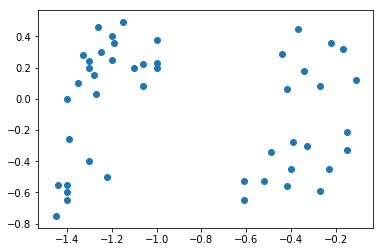

In [124]:
data = np.genfromtxt("KMeans.txt",delimiter=" ")

plt.scatter(data[:,0],data[:,1])
plt.show()

In [125]:
data.shape

(47, 2)

#### 训练模型

In [126]:
# 计算距离
def CalcuDistance(vector1,vector2):
    return np.sqrt(sum((vector1-vector2)**2))

def initCentroids(data,k):
# 初始化质心
    numSamples,dim = data.shape
#     k个质心，列数跟样本的列数一样
    centroids = np.zeros((k,dim))
#     随机选出k个质心
    for i in range(k):
#         随机选取一个样本的索引
        index = int(np.random.uniform(0,numSamples))
#     作为初始化的质心
        centroids[i,:] = data[index,:]
    return centroids

In [127]:
def Kmeans(data,k):
#     计算样本个数
     numSamples = data.shape[0]
#     样本的属性，第一列保存该样本属于哪个簇，第二列保存该样本跟它所属簇的误差
     clusterData = np.array(np.zeros((numSamples,2)))
#    决定质心是否要改变的变量
     clusterChanged = True
# 初始化质心
     centroids = initCentroids(data,k)

     while clusterChanged:
            clusterChanged = False
#         循环每一个样本
            for i in range(numSamples):
#         最小距离
                minDist = 100000.0
#     定义样本所属的簇
                minIndex = 0
                for j in range(k):
#                循环每一个质心和样本，计算距离
                     distance = CalcuDistance(centroids[j,:],data[i,:])
#     如果计算的距离小于最小距离，则更新最小距离
                     if distance < minDist:
                        minDist = distance
#             更新最小距离
                        clusterData[i,1] = minDist
#     更新样本所属的簇
                        minIndex = j
#     如果样本的所属的簇发生变化
            if clusterData[i,0] != minIndex:
#         质心要重新计算
                clusterChanged = True
#     更新样本的簇
                clusterData[i,0] = minIndex
#     更新质心
     for j in range(k):
#             获取第j个簇所在的样本所在的索引
                cluster_index = np.nonzero(clusterData[:,0]==j)
#     第j个簇所有的样本点
                pointsInCluster = data[cluster_index]
#     计算质心
                centroids[j,:] = np.mean(pointsInCluster,axis=0)
#                 showCluster(data,k,centroids,clusterData)
     return centroids,clusterData

In [128]:
# 显示结果
def showCluster(data,k,centroids,clusterData):
        numSamples,dim = data.shape
        if dim != 2:
            print("dimension of your data is not 2!")
            return 1
#         用不同颜色形状来表示各个类别
        mark = ['or','ob','og','ok','-r','+r','sr','dr','<r','pr']
        if k > len(mark):
            print("your k is too large")
            return 1
#         画样本点
        for i in range(numSamples):
            markIndex = int(clusterData[i,0])
            plt.plot(data[i,0],data[i,1],mark[markIndex])
#             用不同颜色形状来表示各个类别
        mark=['*r','*b','*g','*k','b','+b','db','<b','pb']
#     画质心点
        for i in range(k):
            plt.plot(centroids[i,0],centroids[i,1],mark[i],markersize=20)
        plt.show()

Error


C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


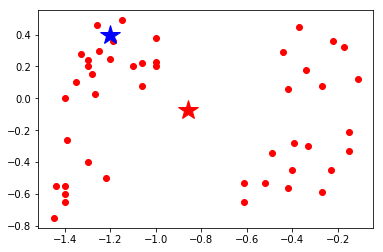

In [129]:
k = 4
centroids,clusterData = Kmeans(data,k)
if np.isnan(centroids).any():
    print('Error')
else:
    print('cluster complete!')

showCluster(data,k,centroids,clusterData)

In [110]:
centroids

array([[-0.86404255, -0.06489362],
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan]])